In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
data=pd.read_csv("C:/Users/user/Downloads/twitter_training.csv")
vdata=pd.read_csv("C:/Users/user/Downloads/twitter_validation.csv")

In [6]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
vdata.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [8]:
data.describe

<bound method NDFrame.describe of        2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
0      I am coming to the borders and I will kill you...     
1      im getting on borderlands and i will kill you ...     
2      im coming on borderlands and i will murder you...     
3      im getting on borderlands 2 and i will murder ...     
4      im getting into borderlands and i can murder y...     
...                                                  ...     
74676  Just realized that the Windows partition of my...     
74677  Just r

In [9]:
vdata.describe

<bound method NDFrame.describe of      3364             Facebook  Irrelevant  \
0     352               Amazon     Neutral   
1    8312            Microsoft    Negative   
2    4371                CS-GO    Negative   
3    4433               Google     Neutral   
4    6273                 FIFA    Negative   
..    ...                  ...         ...   
994  4891  GrandTheftAuto(GTA)  Irrelevant   
995  4359                CS-GO  Irrelevant   
996  2652          Borderlands    Positive   
997  8069            Microsoft    Positive   
998  6960      johnson&johnson     Neutral   

    I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0    BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                              

In [10]:
data.columns=['user','game','state','comments']
vdata.columns=['user','game','state','comments']


In [11]:
data.head()

,user,game,state,comments
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [12]:
vdata.head()

,user,game,state,comments
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [14]:
data.shape


(74681, 4)

In [15]:
vdata.shape

(999, 4)

In [16]:
id_types = data['user'].value_counts()
id_types

user
5203    6
6164    6
6141    6
6142    6
6143    6
       ..
4678    6
4679    6
4680    6
4681    6
2401    5
Name: count, Length: 12447, dtype: int64

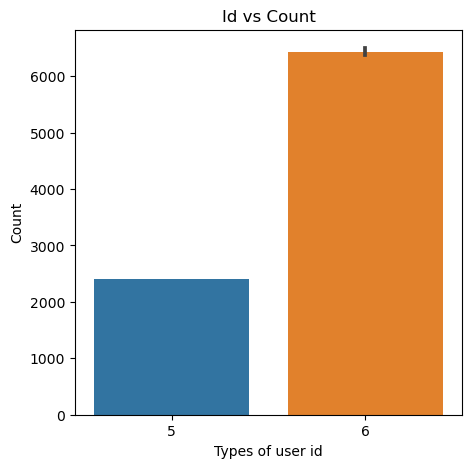

In [18]:
plt.figure(figsize=(5,5))
sns.barplot(y=id_types.index, x=id_types.values)  
plt.xlabel('Types of user id')
plt.ylabel('Count')
plt.title('Id vs Count')
plt.show()


In [19]:
game_types = data['game'].value_counts()
game_types

game
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)          

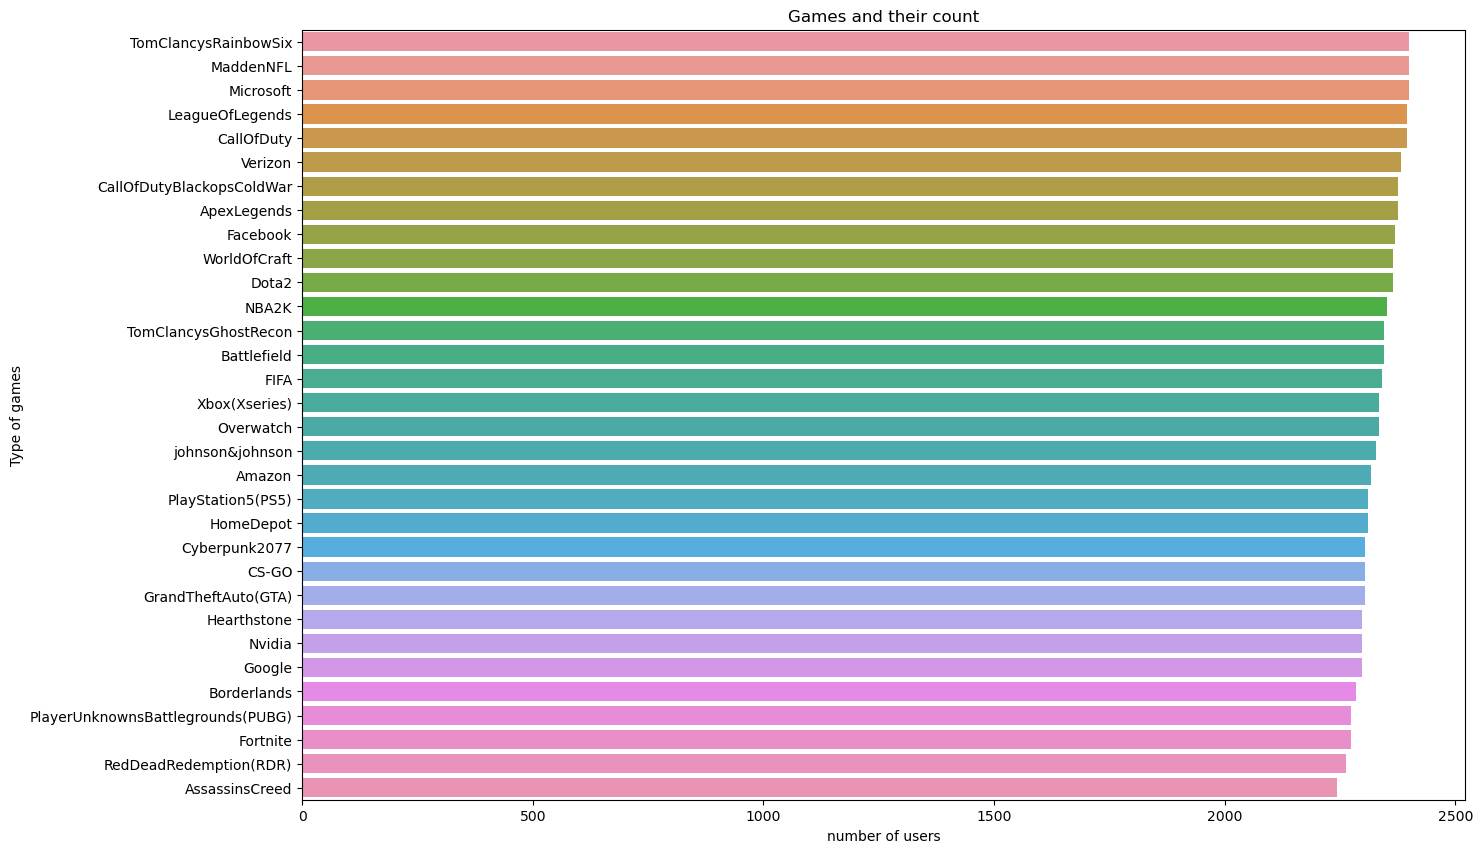

In [22]:
plt.figure(figsize=(15,10))

sns.barplot(x=game_types.values,y=game_types.index)  
plt.title('Games and their count')
plt.ylabel('Type of games')
plt.xlabel('number of users')

plt.show()

<Figure size 1000x1000 with 0 Axes>

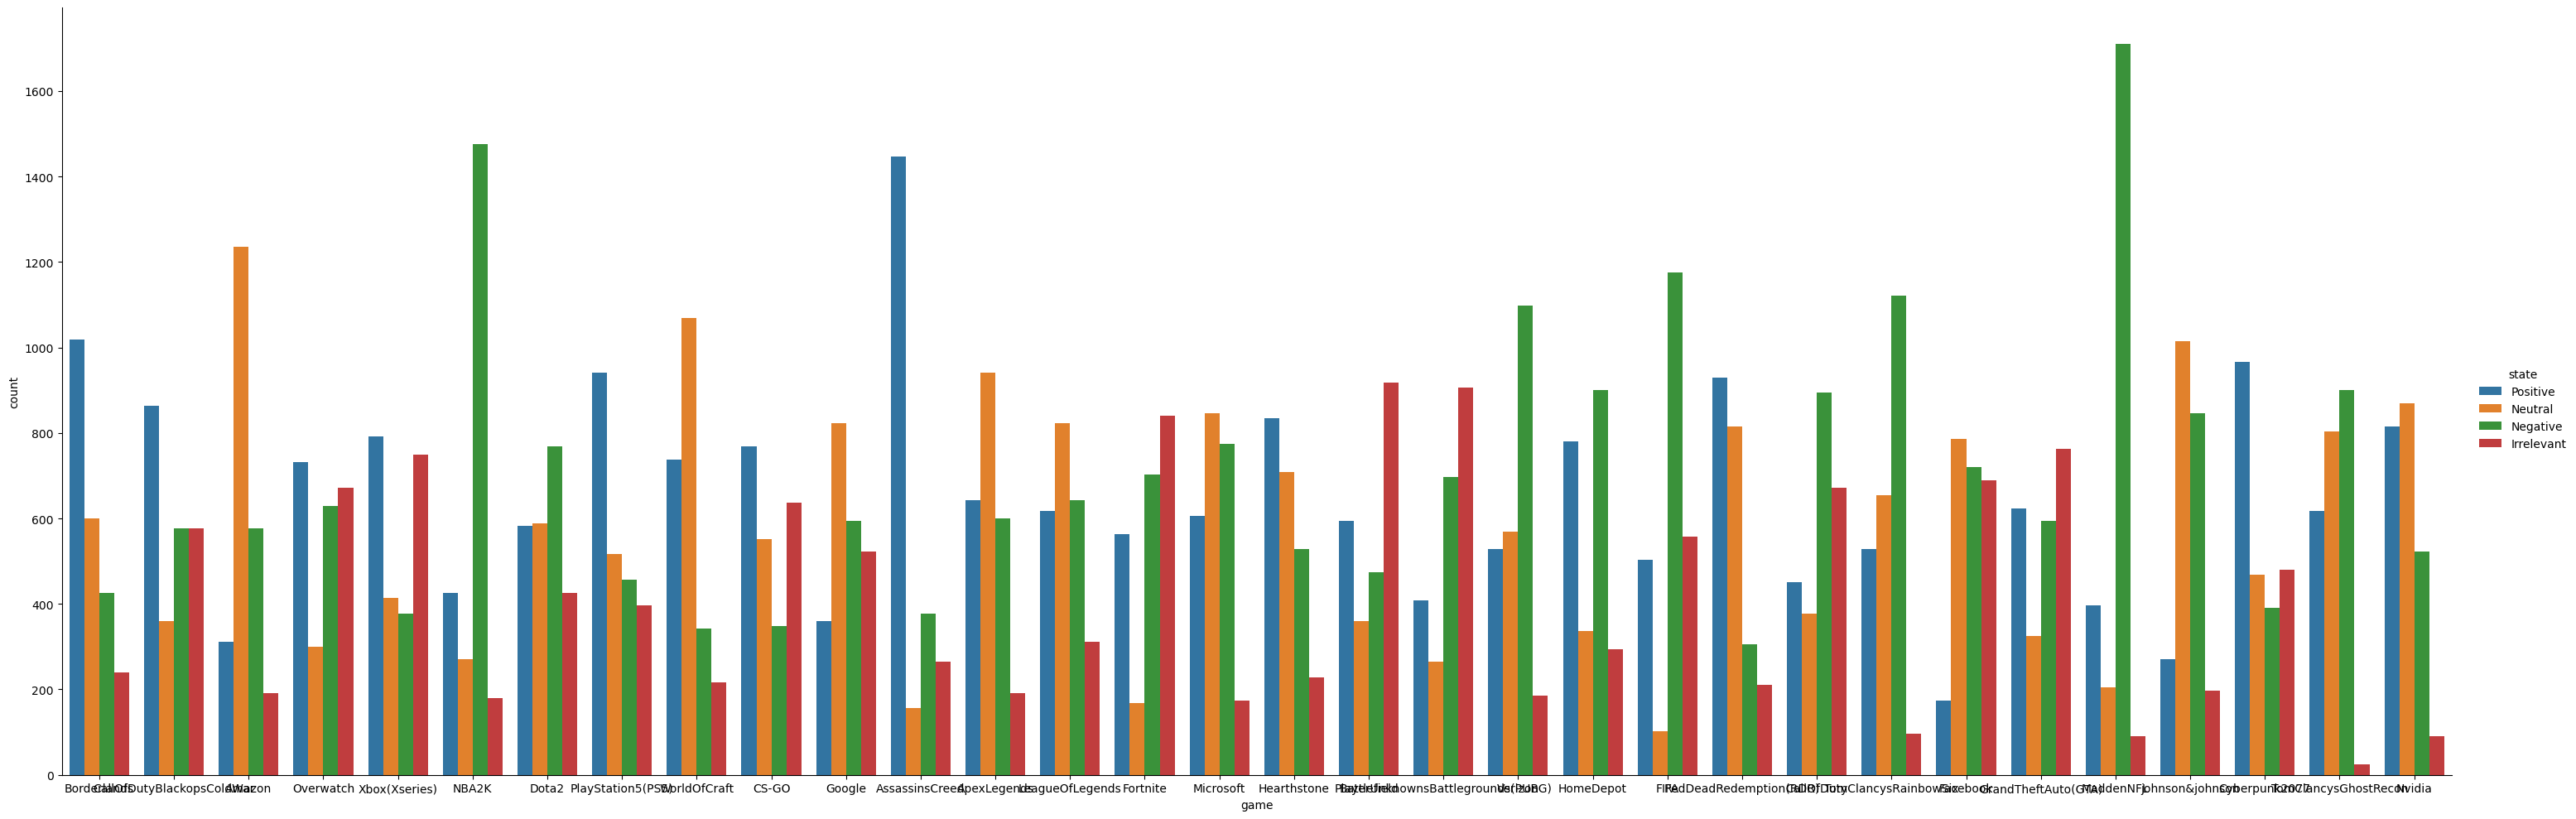

In [25]:
plt.figure(figsize=(10,10))
sns.catplot(x="game",hue="state", kind="count",height=10,aspect=3, data=data)


In [26]:
total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  74681


,Total Missing,In Percent
comments,686,0.92
user,0,0.00
game,0,0.00
state,0,0.00


In [27]:
data.dropna(subset=['comments'],inplace=True)

total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  73995


,Total Missing,In Percent
user,0,0.0
game,0,0.0
state,0,0.0
comments,0,0.0


In [30]:
train0=data[data['state']=="Negative"]
train1=data[data['state']=="Positive"]
train2=data[data['state']=="Irrelevant"]
train3=data[data['state']=="Neutral"]

In [31]:
train0.shape, train1.shape, train2.shape, train3.shape

((22358, 4), (20654, 4), (12875, 4), (18108, 4))

In [32]:
train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]

In [35]:
data=pd.concat([train0,train1,train2,train3],axis=0)
data

,user,game,state,comments
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...,...
5603,165,Amazon,Neutral,An amazing read aloud book for you and your ch...
5604,165,Amazon,Neutral,An amazing reading book for you and your child...
5605,165,Amazon,Neutral,An amazing book to read aloud for you and your...
5606,165,Amazon,Neutral,An amazing read aloud book for you and your ch...


In [36]:
id_types = data['user'].value_counts()
id_types

user
2405    6
1810    6
1748    6
1754    6
1760    6
       ..
1602    3
1880    3
333     3
9388    2
9267    2
Name: count, Length: 1040, dtype: int64

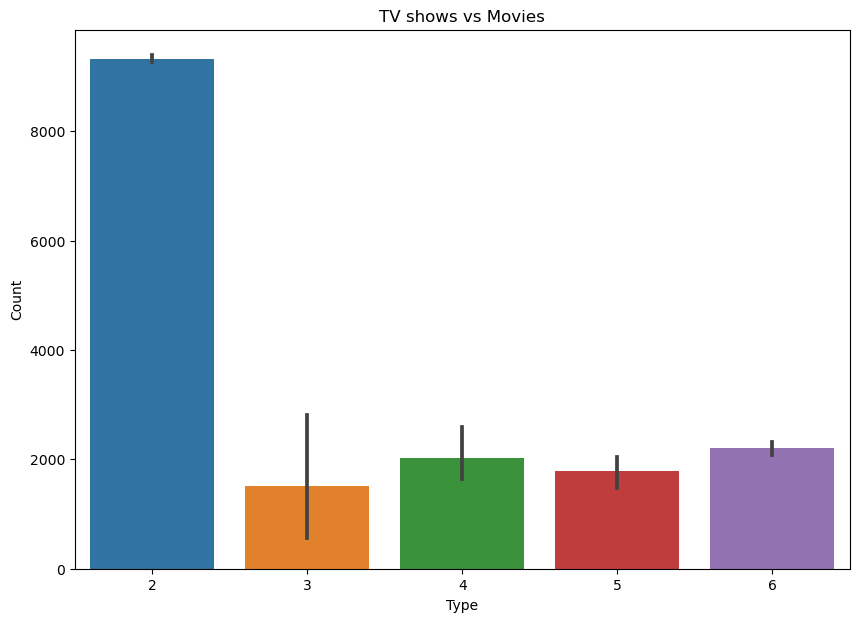

In [38]:
plt.figure(figsize=(10,7))
sns.barplot(x=id_types.values,y=id_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('TV shows vs Movies')
plt.show()

In [39]:
game_types = data['game'].value_counts()
game_types


game
Borderlands                  2279
CallOfDutyBlackopsColdWar    2192
Amazon                       1321
Overwatch                     373
Name: count, dtype: int64

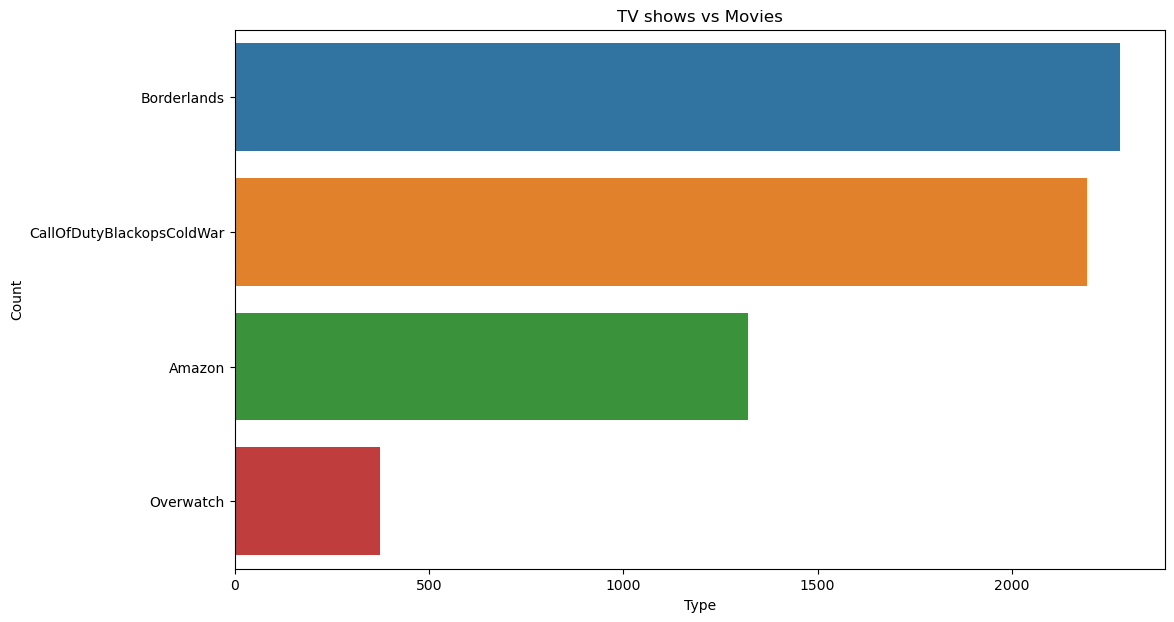

In [41]:
plt.figure(figsize=(12,7))
sns.barplot(x=game_types.values,y=game_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('TV shows vs Movies')
plt.show()

In [44]:
commtypes = data['state'].value_counts()
commtypes

state
Negative      1863
Positive      1721
Neutral       1509
Irrelevant    1072
Name: count, dtype: int64

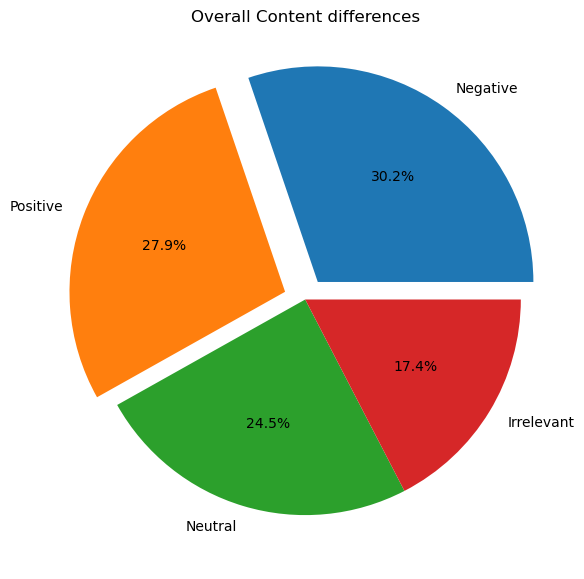

In [46]:
plt.figure(figsize=(12,7))
plt.pie(x=commtypes.values, labels=commtypes.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('Overall Content differences')
plt.show()

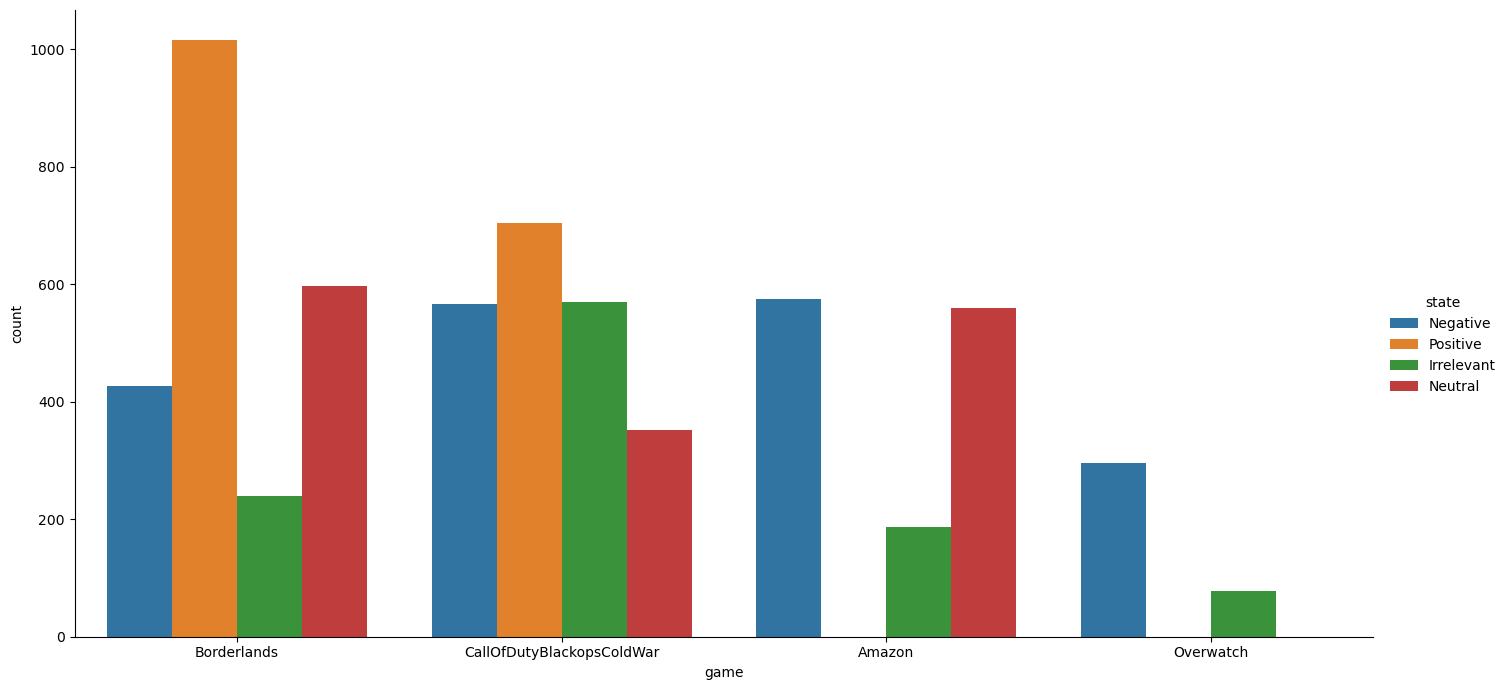

In [47]:
sns.catplot(x='game',hue='state',kind='count',height=7,aspect=2,data=data)

In [48]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [51]:
data['comments']=label_encoder.fit_transform(data['comments'])
data['game']=label_encoder.fit_transform(data['game'])
vdata['comments']=label_encoder.fit_transform(vdata['comments'])
vdata['game']=label_encoder.fit_transform(vdata['game'])

In [53]:
data = data.drop(['user'],axis=1)

data

,game,state,comments
23,1,Negative,5636
24,1,Negative,4373
25,1,Negative,4373
26,1,Negative,5637
27,1,Negative,1847
...,...,...,...
5603,0,Neutral,1085
5604,0,Neutral,1086
5605,0,Neutral,1081
5606,0,Neutral,1085


In [54]:
data.nunique()

game           4
state          4
comments    5854
dtype: int64

In [55]:
vdata.nunique()

user        999
game         32
state         4
comments    998
dtype: int64